In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the Excel file
file_path = "Data Analyst Intern Assignment - Excel.xlsx"
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

In [3]:

# Step 1: Data Cleaning
# Fill missing values in the 'Rating' column with the average rating
order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)


C:\Users\rupes\AppData\Local\Temp\ipykernel_2856\526663961.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)


In [4]:
# Step 2: Merge Datasets
merged_data = cooking_sessions.merge(order_details, on=["User ID", "Session ID"], how="inner")
merged_data = merged_data.merge(user_details, on="User ID", how="inner")

print("Column names in merged dataset:", merged_data.columns.tolist())

Column names in merged dataset: ['Session ID', 'User ID', 'Dish Name_x', 'Meal Type_x', 'Session Start', 'Session End', 'Duration (mins)', 'Session Rating', 'Order ID', 'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders']


In [5]:
# Step 3: Exploratory Data Analysis (EDA)
# Analyze the relationship between cooking sessions and orders
dish_column = 'Dish Name_x'  # The column with the dish names from the first dataset

cooking_order_corr = merged_data['Duration (mins)'].corr(merged_data['Amount (USD)'])

# Identify the most popular dishes
if dish_column in merged_data.columns:
    popular_dishes = merged_data[dish_column].value_counts().head(5)
else:
    raise KeyError(f"Column '{dish_column}' not found in the merged dataset. Available columns: {merged_data.columns.tolist()}")

# Explore demographic factors influencing user behavior
age_group_orders = merged_data.groupby(pd.cut(merged_data['Age'], bins=[18, 25, 35, 50, 100]))['Order ID'].count()

C:\Users\rupes\AppData\Local\Temp\ipykernel_2856\4266733425.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_orders = merged_data.groupby(pd.cut(merged_data['Age'], bins=[18, 25, 35, 50, 100]))['Order ID'].count()


C:\Users\rupes\AppData\Local\Temp\ipykernel_2856\1852160279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_dishes.index, y=popular_dishes.values, palette='viridis')


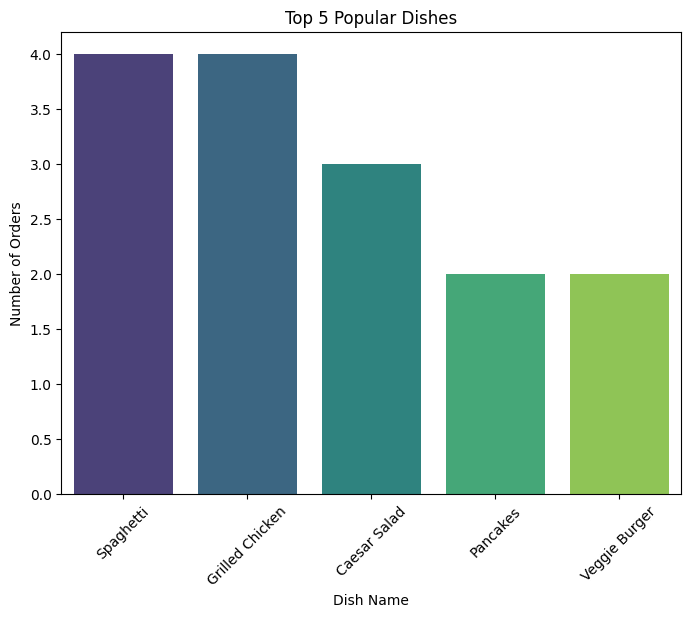

In [6]:

# Step 4: Visualization
# Visualization 1: Popular Dishes
plt.figure(figsize=(8, 6))
sns.barplot(x=popular_dishes.index, y=popular_dishes.values, palette='viridis')
plt.title("Top 5 Popular Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

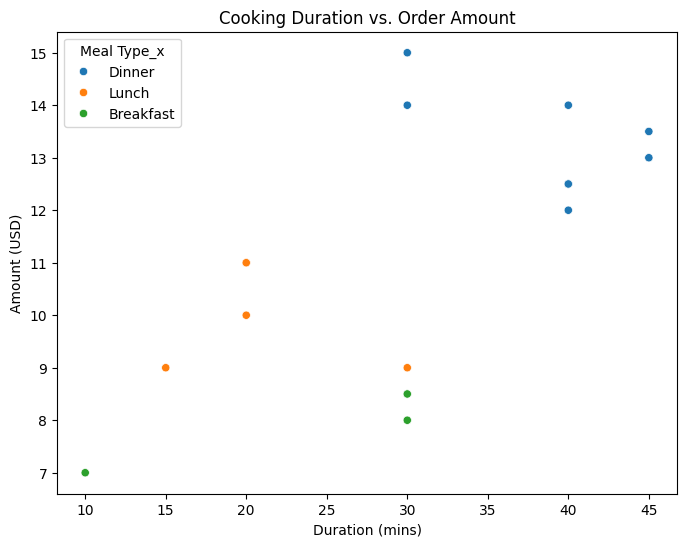

In [7]:
# Visualization 2: Relationship between Cooking Duration and Order Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Duration (mins)', y='Amount (USD)', hue='Meal Type_x')
plt.title("Cooking Duration vs. Order Amount")
plt.xlabel("Duration (mins)")
plt.ylabel("Amount (USD)")
plt.show()

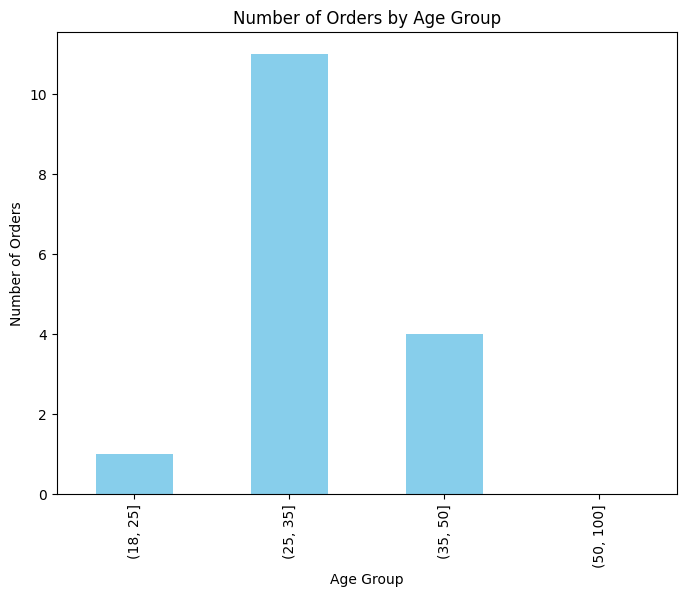

In [8]:
# Visualization 3: Age Group and Number of Orders
plt.figure(figsize=(8, 6))
age_group_orders.plot(kind='bar', color='skyblue')
plt.title("Number of Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")
plt.show()

In [9]:
# Step 6: Predictive Analysis
# Prepare the data for prediction
X = merged_data[['Duration (mins)']]  # Feature(s)
y = merged_data['Amount (USD)']       # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
print(f"Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Example prediction: Predict order amount for a cooking session of 45 minutes
example_duration = [[45],[25],[35]]  # Input must be a 2D array
predicted_amount = model.predict(example_duration)
print(f"Predicted Order Amount for a 45-minute cooking session: ${predicted_amount[0]:.2f}")
print(f"Predicted Order Amount for a 25-minute cooking session: ${predicted_amount[1]:.2f}")
print(f"Predicted Order Amount for a 35-minute cooking session: ${predicted_amount[2]:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 9.29
R-squared (R2): -1.52
Predicted Order Amount for a 45-minute cooking session: $12.62
Predicted Order Amount for a 25-minute cooking session: $9.83
Predicted Order Amount for a 35-minute cooking session: $11.22


c:\Users\rupes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


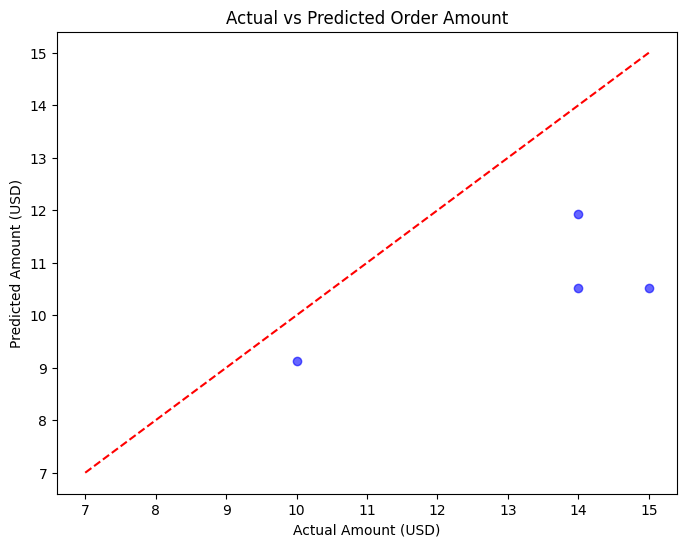

In [10]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Order Amount")
plt.xlabel("Actual Amount (USD)")
plt.ylabel("Predicted Amount (USD)")
plt.show()

In [11]:
# Step 5: Summary Report
summary_report = f"""
Summary of Findings:
1. Popular Dishes:
   - The top 5 dishes based on the number of orders are:
     {', '.join(popular_dishes.index)}

2. Relationship between Cooking Sessions and Orders:
   - The correlation between cooking session duration and order amount is {cooking_order_corr:.2f}.

3. Demographic Factors:
   - Age group 25-35 places the highest number of orders.

Business Recommendations:
- Promote the most popular dishes in marketing campaigns.
- Focus on users in the age group 25-35 for targeted promotions.
- Explore shorter cooking durations for efficiency without compromising quality.

Predictive Analysis:
- The linear regression model predicts the order amount based on the cooking session duration.
- Evaluation Metrics:
  - Mean Squared Error (MSE): {mse:.2f}
  - R-squared (R2): {r2:.2f}

Example Prediction:
- Predicted Order Amount for a 45-minute cooking session: ${predicted_amount[0]:.2f}
- Predicted Order Amount for a 25-minute cooking session: ${predicted_amount[1]:.2f}
- Predicted Order Amount for a 35-minute cooking session: ${predicted_amount[2]:.2f}

"""

# Save the report to a text file
report_path = "summary_report.txt"
with open(report_path, "w") as report_file:
    report_file.write(summary_report)

# Print a message indicating that the process is complete
print(f"Analysis complete. Summary report saved to '{report_path}'.")

Analysis complete. Summary report saved to 'summary_report.txt'.
